#  Initial boundary value problems (IBVPs)
<br />

> _The inside of a computer is as dumb as hell but it goes like mad!_ - Richard Feynman

## Motivation

We count with a conductive rod of homogeneous (and constant) cross section and length $L$. Initially, the rod is at a temperature of 100 degrees at every point. However, at $t=t_0$, the rod's ends are put to 0 degrees. Of course, we know that the temperature of the rod in steady state will be zero, but now we are interested in how fast this temperature drops for every point within the object. We know that the temperature satisfies the equation


$$
\frac{\partial T(t;x)}{\partial t}=c \frac{\partial^2 T(t;x)}{\partial x^2},
$$

where $c$ is the thermal diffusivity of the medium, and takes into account the thermal conductivity, the specific heat, and the density of the material. How can we compute the change in temperature as a function of time?

## Mathematical formulation

We look for a function $u(t;x)$ satisfying


\begin{equation}
\frac{\partial u}{\partial t}=c \frac{\partial^2 u}{\partial x^2},\label{init}
\end{equation}

and subject to the following conditions:


* the solution at the initial time is known, i.e., $u(t_0;x)=g(x)$. This is called _initial condition_ (IC).
* we have information regarding the solution on the boundaries for all times, e.g., $u(t;x_0)=\alpha(x_0)$ and $u(t;x_n)=\beta(x_n)$. These are called _boundary conditions_ (BCs).   


As usual, we will not compute such a solution analytically (which may be very difficult or even impossible) but a numerical approximation at certain times and positions in space, i.e.,


$$
u(t_k;x_i)\approx u_i^k.
$$

To do so, we employ the finite difference method (FDM).


***Note***: These problems are called "1D+t" since they have one spatial and one temporal dimension. If the problem has N spatial dimensions, it usually takes the name "ND+t".

## The finite difference method

Once again, we utilise the FDM to solve the heat equation. Although this problem looks similar to last week's, we cannot employ the centred difference scheme for the time differential, since it will require more ICs than those given (although there are workarounds, as we will see next week). For this reason, we start by employing the $O(h_t)$ forward difference formula for $u_t$ and the centred $O(h_x^2)$ formula for $u_{xx}$, with $h_t$ and $h_x$ being the time and space discretisation steps, respectively. We get the following $O(h_t;h_x^2)$ discretisation


$$
\frac{u_i^{k+1}-u_i^k}{h_t}=c \frac{u_{i+1}^k-2u_i^k+u_{i-1}^k}{h_x^2}.
$$

Solving for $u_i^{k+1}$ we obtain

$$
u_i^{k+1}=u_i^k +  C \left(u_{i+1}^k-2u_i^k+u_{i-1}^k\right),
$$

where

$$C=c \frac{h_t}{h_x^2}.$$

This formula (which is no other than the explicit Euler's method!) allows to compute the value of the solution anywhere in space at $t=t_{k+1}$ assuming we know the solution everywhere at the previous time, i.e., for $t\leq t_k$.

**Example.** We solve the problem from the motivation considering $c=1\ m^2/s$, $L=1\ m$, $h_x=0.1\ m$, and $h_t=0.01\ s$.  In this case, $C=0.1$, so

* in the first time step, the discretised equation takes the form

$$T_i^{1}=T_i^0 +  C \left(T_{i+1}^0-2T_i^0+T_{i-1}^0\right),$$

  which is valid for every point in the domain (i.e., $i=1,\dots,n-1$, since $T(t;0)=T(t;n)=0$ deg).


* Now we have the solution for every space point and first time, we move to the second time. The discretised equation takes the form

$$T_i^{2}=T_i^1 +  C \left(T_{i+1}^1-2T_i^1+T_{i-1}^1\right),$$

  which can be easily calculated from the previous result.


* And so on ...

Although somehow tedious, it is straightforward to do the calculations. Since we know the solution at the previous time step for every point, the calculation is direct, and does not present challenges.

---

Before moving to Python, we note that, as before, we can find a stencil representing the algorithm, now in the _time vs. space_ domain:

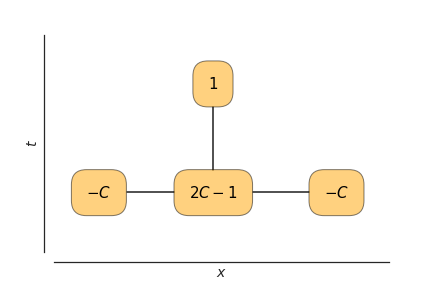

Differently than in the case of BVPs, the stencil has to be centred on the uppermost blob. It very clear that, since all the dependencies for computing are below it (i.e., related to previous times), the calculation does not require any additional tricks (as solving a system of equations). For this reason, we say the method is _explicit_ (it was to be expected, as it is Euler's method!)

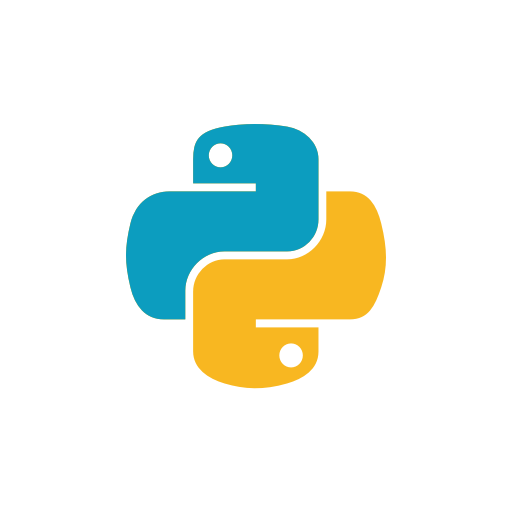

To implement the _explicit Euler's_ method in Python, we write a function that stores the solution in a 2D array, the first dimension representing changes in time, and the second in space. The inputs are the space and time discretisations, as well as a function handling the ICs. And it computes the solution at the following time using a simple for loop.

In [1]:
def Euler_e(x, t, alpha, beta, IC, c):
    hx, ht = x[1] - x[0], t[1] - t[0]
    C = c * ht / hx**2
    u = np.zeros((t.shape[0], x.shape[0])) # allocate memory
    u[0,:] = IC(x) # impose ICs
    u[:,0] = alpha; u[:,-1] = beta; # impose BCs
    for k in range(len(t)-1):
        u[k+1,1:-1] = C * (u[k,2::] + u[k,0:-2]) + (1-2*C) * u[k,1:-1]
    return u

**Example.** Now, we can solve the problem from the motivation with the following parameters:

* $t\in [0,0.3]\ s$, $h_t=0.001\ s$
* $L=1\ m$, and $h_x=0.05\ m$

Since the solution is 1D+t (i.e., 1 spatial + 1 temporal dimensions), we present the result as both 2D color plot figure and as several 1D curves for different times:

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

t0, tf, ht = 0, 0.3, 0.001
x0, xn, hx = 0, 1, 0.05
c = 1
alpha, beta = 0, 0 # BCs

# initial condition
def IC(x):
    return 0*x+100

x = np.arange(x0, xn+hx, hx) # space discretisation
t = np.arange(t0, tf+ht, ht) # time discretisation
u_e = Euler_e(x, t, alpha, beta, IC, c)

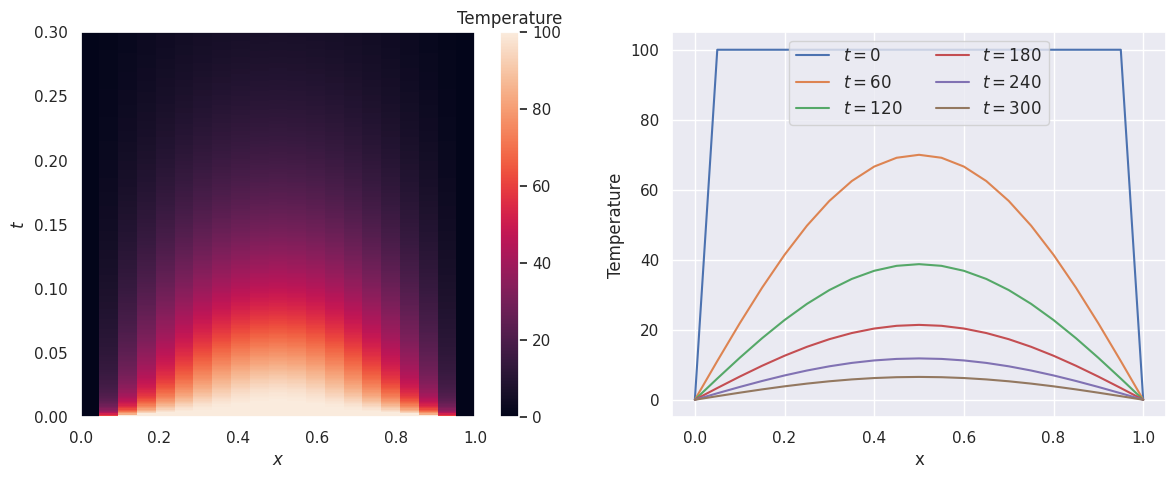

In [3]:
# plot
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
xx, tt = np.meshgrid(np.linspace(x0, xn, u_e.shape[1]+1), np.linspace(t0, tf, u_e.shape[0]+1))
plt.pcolormesh(xx, tt, u_e, vmin=0, vmax=100);
plt.xlabel('$x$', fontsize=12); plt.ylabel('$t$', fontsize=12);
clb = plt.colorbar(); clb.ax.set_title('Temperature')

plt.subplot(1,2,2)
index = np.arange(0, t.shape[0], int(len(t)/5)) # plot solution every 5 time steps
for i in index:
    plt.plot(x, u_e[i,:], label='$t=${}'.format(i));
plt.ylabel('Temperature', fontsize=12); plt.xlabel('x', fontsize=12);
plt.legend(fontsize=12, ncol=2, loc='upper center');

We can see that the temperature effectively goes to zero as time moves on. It can prove very useful to generate an animation to observe the variation of the temperature alongside the bar as a function of time. To do this, we use the ```FuncAnimation``` function available in ```matplotlib.animation```, for which we need to transform the Jupyter notebook to ```%matplotlib notebook``` to allow the cell to update. Then, we can just call the movie thanks to the ```IPython.display``` package, as shown below:

In [4]:
import matplotlib.animation as animation
from IPython.display import HTML

def anim_1D(x, u):

    fig, ax = plt.subplots()
    line, = ax.plot(x, u[0,:])
    plt.ylim(np.min(u)*1.1,np.max(u)*1.1)
    plt.xlabel('x'), plt.ylabel('T')

    def init():  # only required for blitting to give a clean slate.
        line.set_ydata([np.nan] * len(x))
        return line,

    def animate(i):
        line.set_ydata(u[i,:])  # update the data.
        return line,

    ani = animation.FuncAnimation(
        fig, animate, init_func=init, interval=20, blit=True, frames=300)

    plt.close(ani._fig)

    return ani

# Now use the function
ani = anim_1D(x, u_e)
HTML(ani.to_html5_video())

---

The use of the Python function allows to find the solution for different step sizes and see their effects. For example, we can investigate the effect of $h_t$ in the solution, by solving the same problem with $h_{t_1}=0.001\ s$ (already computed) and $h_{t_2}=0.0013\ s$ (not much of a difference, right?):

In [5]:
# back to the inline mode
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt

ht2 = 0.0013
t2 = np.arange(t0, tf+ht2, ht2) # new time discretisation
u_e2 = Euler_e(x, t2, alpha, beta, IC, c)

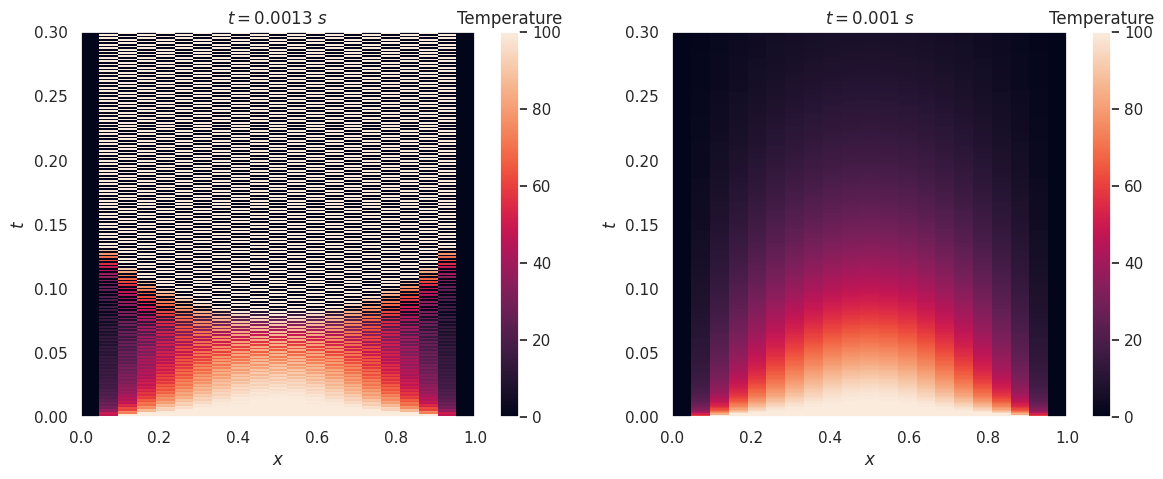

In [6]:
# plot
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
xx, yy = np.meshgrid(np.linspace(x0, xn, u_e.shape[1]+1), np.linspace(t0, tf, u_e2.shape[0]+1))
plt.pcolormesh(xx, yy, u_e2, vmin=0, vmax=100);
plt.xlabel('$x$', fontsize=12); plt.ylabel('$t$', fontsize=12); plt.title('$t=0.0013\\ s$')
clb = plt.colorbar(); clb.ax.set_title('Temperature');

plt.subplot(1,2,2)
xx, tt = np.meshgrid(np.linspace(x0, xn, u_e.shape[1]+1), np.linspace(t0, tf, u_e.shape[0]+1))
plt.pcolormesh(xx, tt, u_e, vmin=0, vmax=100);
plt.xlabel('$x$', fontsize=12); plt.ylabel('$t$', fontsize=12); plt.title('$t=0.001\\ s$')
clb = plt.colorbar(); clb.ax.set_title('Temperature');

What happened? It can be clearly seen that, as we knew from the lectures on IVPs, the explicit Euler's method is conditionally stable (unstable for the first step size and stable for the second). This leads us to the following questions:

* Is there any stability condition for the equation presented?

The answer is _yes_ and this is the so called _Courant–Friedrichs–Lewy condition_ , which states that, if we want the explicit Euler scheme to be stable, it must satisfy


$$
\frac{h_t}{h_x^2}<\frac{1}{2}.
$$


In our previous example, $h_t<h_x^2/2=0.05^2/2=0.00125\ s$, and we can see why such a slight change in the time step size messed up the result.


* Can we find an unconditionally stable method for solving our equation?


To answer this, we need to take a closer look.

### The implicit Euler's method

Following the steps from the IVPs lectures, we can get an implicit method by utilising the backward difference formula rather than the forward, i.e.,

$$
\frac{u_i^{k}-u_i^{k-1}}{h_t}=c \frac{u_{i+1}^k-2u_i^k+u_{i-1}^k}{h_x^2}.
$$

Rearranging, we get

$$
u_i^{k} (2C+1) -u_i^{k-1} -Cu_{i+1}^k-Cu_{i-1}^k=0,
$$

which can be represented by the following stencil:

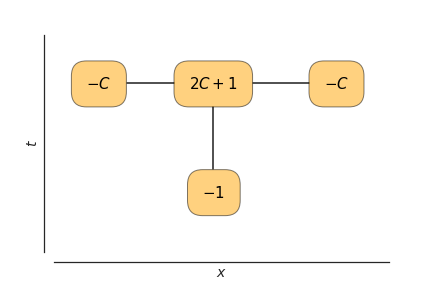

which is centred on the cell with the term $2C+1$. Its use results in a system of equations (as we feared). Assuming Dirichlet BCs:


\begin{align*}
\begin{bmatrix}
   2C+1 & -C & 0 & 0& 0 & \dots & 0\\
   -C & 2C+1 & -C & 0 & 0 &\dots& 0\\
   0&\vdots & \ddots & \ddots  & \ddots  & \ddots & 0\\
    0&0 & \dots & \dots & \dots \\
    0 & 0 & 0 & 0& \dots & -C & 2C+1
\end{bmatrix} \begin{bmatrix}
y_{1}^{k+1} \\ y_2^{k+1} \\ \vdots \\  y_{n-1}^{k+1}
\end{bmatrix} = C  \begin{bmatrix}
y_{1}^{k} \\ y_2^{k} \\ \vdots \\  y_{n-1}^{k}
\end{bmatrix}+\begin{bmatrix}
C\alpha \\ 0 \\ \vdots \\ 0 \\ C\beta
\end{bmatrix}.
\end{align*}





Clearly, this method, which results to be implicit, is not as straightforward as its explicit counterpart: the solutions at future time points depend also on neighbouring solutions at that time point too. In other words, we will need to solve a system of equations for every time step! The advantage? ***The method is unconditionally stable!***

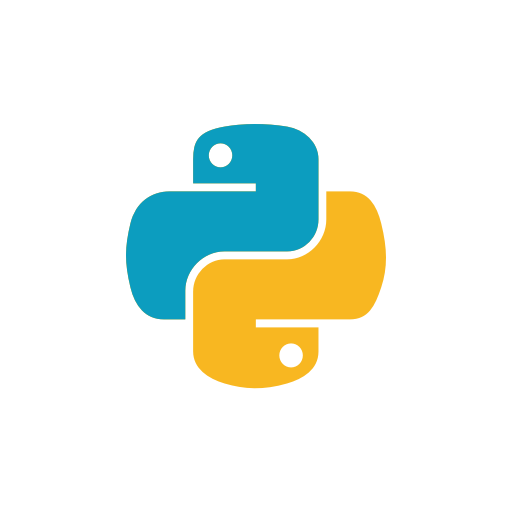

The function implementing the implicit method would require the same inputs. However, we need to build a system of equations for each time step, whose solution needs of Scipy's ```spsolve``` function (or any similar).

In [7]:
import scipy.sparse as sps

def Euler_i(x, t, alpha, beta, IC, c):
    hx, ht = x[1]-x[0], t[1]-t[0]
    sx, st = x.shape[0], t.shape[0]
    C = c * ht / hx**2
    u = np.zeros((st, sx)) # allocate memory
    u[0,:] = IC(x) # impose ICs
    u[:,0] = alpha; u[:,-1] = beta; # impose BCs
    d0 = (2 * C + 1) * np.ones(sx-2)
    d1 = -C * np.ones(sx-3)
    A = sps.diags([d0,d1,d1], [0,1,-1], format='csr')
    for k in range(len(t)-1):
        b = u[k,1:-1]; b[0] = b[0] + C*alpha; b[-1] = b[-1] + C*beta # build vector b
        u[k+1,1:-1] = sps.linalg.spsolve(A, b) # solve system of equations
    return u

**Example.** We will now solve the same problem as before with both explicit and implicit schemes and considering $h_t=0.0013\ s$. To compare the approaches, we compute the error based on the knowledge of the analytical solution

$$
T_a(x,t)=\frac{4}{\pi} \sum_{k=1}^\infty \frac{\sin(2k-1)}{2k-1} \exp(-(2k-1)^2 2 \pi t).
$$

In [8]:
def sol_a(x,t): # analytical solution
    Nx, Nt = x.shape[0], t.shape[0]
    u = np.zeros((Nt,Nx)) # allocate memory
    xx, tt = np.meshgrid(x, t)
    for kk in range(1, 5000):
        u += 4/np.pi*np.sin(xx*np.pi*(2*kk-1))/(2*kk-1)*np.exp(-(2*kk-1)**2*np.pi**2*tt)
    return u

t0, tf, ht = 0, .1, 0.0013
x0, xn, hx = 0, 1, 0.05
c, alpha, beta = 1, 0, 0 # c & BCs (left and right)

# initial condition
def IC(x):
    return 0 * x + 100

x = np.arange(x0, xn+hx, hx) # space discretisation
t = np.arange(t0, tf+ht, ht) # time discretisation

u_a = 100 * sol_a(x, t) # analytical solution
u_e = Euler_e(x, t, alpha, beta, IC, c) # explicit Euler's method
u_i = Euler_i(x, t, alpha, beta, IC, c) # implicit Euler's method

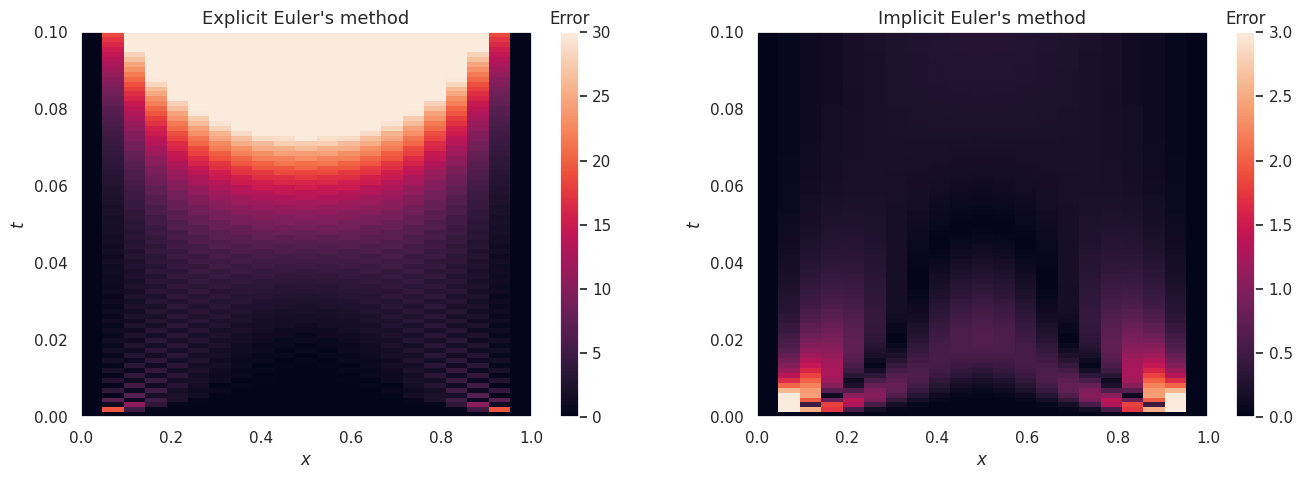

In [9]:
# plot
plt.figure(figsize=(16,5))
xx, tt = np.meshgrid(np.linspace(x0, xn, x.shape[0]+1), np.linspace(t0, tf, t.shape[0]+1))

plt.subplot(1,2,1)
plt.pcolormesh(xx, tt, np.abs(u_e-u_a),vmin=0,vmax=30);
plt.xlabel('$x$', fontsize=12);plt.ylabel('$t$', fontsize=12);
clb = plt.colorbar(); clb.ax.set_title('Error'); plt.title('Explicit Euler\'s method', fontsize=13)

plt.subplot(1,2,2)
plt.pcolormesh(xx, tt, np.abs(u_i-u_a), vmin=0, vmax=3);
plt.xlabel('$x$', fontsize=12);plt.ylabel('$t$', fontsize=12);
clb = plt.colorbar(); clb.ax.set_title('Error'); plt.title('Implicit Euler\'s method', fontsize=13);

***Voilà!***

The difference between algorithms is remarkable (note that the colour scales are different!).
---

## Moving to 2D+t

Now, we are ready to move to more realistic (and consequently complex) problems. In this case, we consider the dynamical process of temperature change within a square plate that was initially at 100 degrees and then, at time $t=t_0$, all boundaries are put to 0 degrees. The equation describing this phenomena is a generalisation of that for 1D+t for 2 spatial dimensions, i.e.,

$$
\frac{\partial u}{\partial t}=c \left( \frac{\partial^2 u}{\partial x^2}+ \frac{\partial^2 u}{\partial y^2} \right),
$$

or, more concisely,

$$
u_t=c\nabla^2u.
$$

Similarly to the 1D case, we need to specify both initial and boundary conditions to the problem. In case of considering Dirichlet BCs, we require

* **Initial condition**: $u(t_0;x,y)=g(x,y)$ (i.e., we know the solution everywhere at the initial time);


* **Boundary conditions**: $u(t;x_b,y_b)=\alpha(t;x_b,y_b)$ for any point $(x_b,y_b)\in\partial\Omega$ (i.e., we know the solutions on the boundaries at any time).

As before, we will look for a numerical approximation using the FDM, $u(t_k;x_i,y_j)\approx u^k_{i,j}$. To do so we need to discretise (i.e., approximate) three differentials! Following the 1D case, we will use centred $O(h_{x,y}^2)$ differences for the spatial differentials, and an $O(h_t)$ approximation for the time differential.

### Explicit Euler's method

In this case, we use the forward difference approximation for the time differential. This leads us to

$$
\frac{u_{i,j}^{k+1}-u_{i,j}^{k}}{h_t}=c\left(\frac{u_{i+1,j}^{k}-2u_{i,j}^{k}+u_{i-1,j}^{k}}{h_x^2}+ \frac{u_{i,j+1}^{k}-2u_{i,j}^{k}+u_{i,j-1}^{k}}{h_y^2}  \right).
$$

Rearranging, we get

$$
u_{i,j}^{k+1}=u_{i,j}^{k}+h_t c\left(\frac{u_{i+1,j}^{k}-2u_{i,j}^{k}+u_{i-1,j}^{k}}{h_x^2}+ \frac{u_{i,j+1}^{k}-2u_{i,j}^{k}+u_{i,j-1}^{k}}{h_y^2}  \right).
$$

Although it seems complicated, its meaning is simple: the solution at future times depend on solutions at previous times. This can be also seen in the 3D stencil depicted below (centred at the cell with coefficient -1)

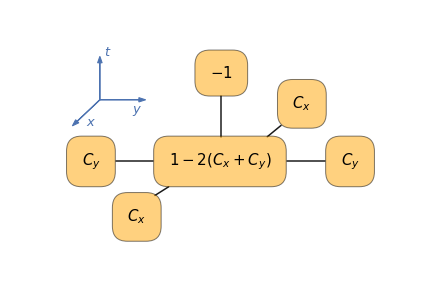

where $C_x=ch_t/h_x^2$ and $C_y=ch_t/h_y^2$.

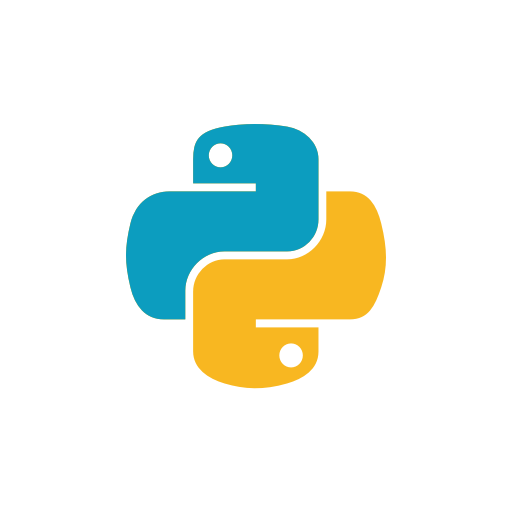

The implementation of Euler's method in 2D+t is similar as for 1+1D. We can simplify the coding (or at least compartmentilise it) by separating the impact of the function $f$, as we did for IVPs (!):

In [10]:
def Euler_e2_d(x, y, t, c):
    hx, hy, ht = x[1]-x[0], y[1]-y[0], t[1]-t[0]
    xx, yy = np.meshgrid(x, y)
    u = np.zeros((t.shape[0],x.shape[0],y.shape[0]))

    u[0,:,:] = IC(xx,yy)
    u[0,:,:] = BC(u[0,:,:])

    for k in range(len(t)-1):
        u[k+1,1:-1,1:-1] = u[k,1:-1,1:-1] + ht * f(u[k,:,:], hx, hy, c)
        u[k+1,:,:] = BC(u[k+1,:,:])
    return u

where, in this case, ```f``` is given by

In [11]:
def f(u, hx, hy, c):
    uxx = (u[0:-2,1:-1]+u[2::,1:-1]-2*u[1:-1,1:-1]) / hx**2
    uyy = (u[1:-1,0:-2]+u[1:-1,2::]-2*u[1:-1,1:-1]) / hy**2
    return c*(uxx+uyy)

**Example.** We can solve the 2D dynamic temperature problem as presented at the beginning of the section employing the forward scheme and the following parameters: $t_0=0\ s$, $t_f=0.125\ s$, $h_t=10\ \mu s$, $x_0=0\ m$, $x_n=1\ m$, $h_x=h_y=0.01\ m$, and $c=1\ m^2/s$. We can use Python to compute the solution at different times to see the evolution of the temperature distribution:

In [12]:
t0, tf, ht = 0, .125, 10e-6
x0, xn, hx = 0, 1, 0.01
c = 1

def IC(x,y):
    out = 100 * np.ones((x.shape[0], y.shape[0]))
    return out

def BC(u):
    u[-1,:] = 0
    u[0,:] = 0
    u[:,-1] = 0
    u[:,0] = 0
    return u

t = np.arange(t0, tf+ht, ht)
x = np.arange(x0, xn+hx, hx)
y = x.copy()

u = Euler_e2_d(x, y, t, c)

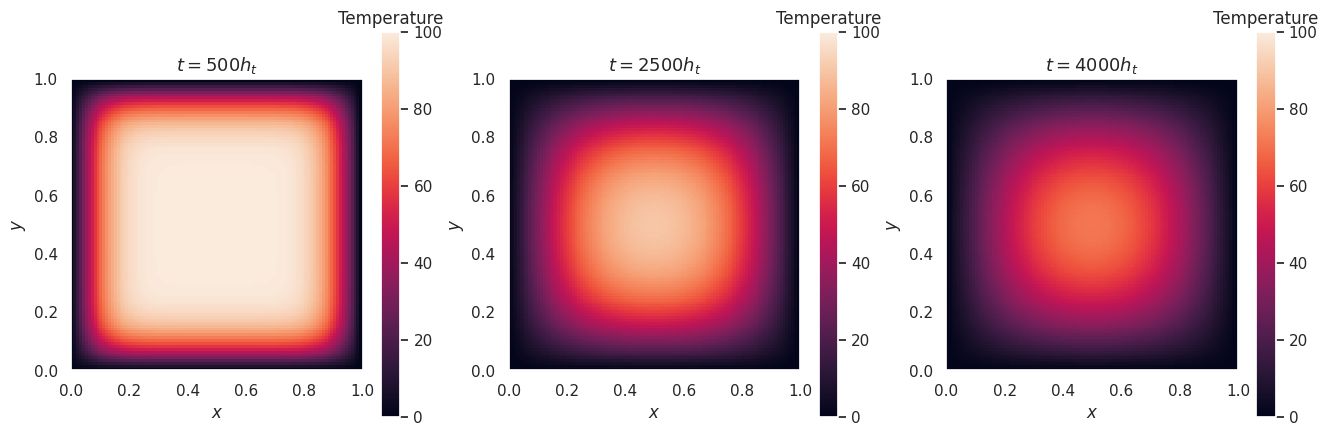

In [13]:
# plot
plt.figure(figsize=(16,5))
xa = np.linspace(x0, xn, x.shape[0]+1)
xx, yy = np.meshgrid(xa, xa)

plt.subplot(1,3,1)
plt.pcolor(xx, yy, u[500,:,:], vmin=0, vmax=100);
plt.xlabel('$x$', fontsize=12); plt.ylabel('$y$', fontsize=12); plt.axis('image')
clb = plt.colorbar(); clb.ax.set_title('Temperature'); plt.title('$t=500h_t$', fontsize=13)

plt.subplot(1,3,2)
plt.pcolor(xx, yy, u[2500,:,:], vmin=0, vmax=100);
plt.xlabel('$x$', fontsize=12); plt.ylabel('$y$', fontsize=12); plt.axis('image')
clb = plt.colorbar(); clb.ax.set_title('Temperature'); plt.title('$t=2500h_t$', fontsize=13)

plt.subplot(1,3,3)
plt.pcolor(xx, yy, u[4000,:,:], vmin=0, vmax=100);
plt.xlabel('$x$', fontsize=12); plt.ylabel('$y$', fontsize=12); plt.axis('image')
clb = plt.colorbar(); clb.ax.set_title('Temperature'); plt.title('$t=4000h_t$', fontsize=13);

Results show the expected change. (You may have also noted that the computer may have taken some time to do it, which indicates that the more realistic the problem is, the more computational resources it takes).

As before, we can plot it as an animation with the following function:

In [14]:
def anim_2D(u):
    fig = plt.figure(figsize=(5, 5)); ax = plt.subplot() # create figure and axes handle
    quad = plt.pcolormesh(u[0]); plt.axis('image') # initial plot
    ax.set_xticks([]); ax.set_yticks([]); clb = plt.colorbar();
    ax.text(120, 70, '$T\\ [^oC]$', color='black', fontsize=12)

    def init():
        quad.set_array([])
        return quad

    def animate(iter):
        quad.set_array(u[iter*3,:,:].ravel())
        return quad

    anim = animation.FuncAnimation(fig, animate, frames=int(u.shape[0]/3),
                                   interval=1, blit=False, repeat=False)
    plt.close(anim._fig)

    return anim

# Now we use it
ani = anim_2D(u)
HTML(ani.to_html5_video())

---

We have to be careful with the stability condition, now reading

$$
h_t (h_x^{-1}+h_y^{-1})<\frac{1}{2}.
$$

To avoid stability problems, we can derive an implicit scheme. You will try some of these variants in the lab.

## Learning points

* We introduced the FDM for solving the dynamic heat equation (also known as diffusion equation)
* We've seen explicit and implicit methods, each with their pros and cons
* You are now ready to do the second assignment!

## Further reading

* Trefethen. "Finite Difference and Spectral Methods for Ordinary and Partial Differential Equations". Chapters 3 and 6. Available [here](https://people.maths.ox.ac.uk/trefethen/pdetext.html).
* Trefethen, Birkisson, and Driscoll. "Exploring ODEs". Chapter 22. Available [here](https://people.maths.ox.ac.uk/trefethen/ExplODE/).